# Creating Model for Deployment

In [2]:
#sebelum import libary kita harus meninstall pandas_profilling

!pip install pandas_profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=eb67c8aa5082e699a6f24b647aa68605c7b90168d4da2d2173648ae36038e62e
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin


In [3]:
#import library 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import pickle

%matplotlib inline 

In [5]:
data = pd.read_csv('dataset/Placement_Data_Full_Class.csv')

#remove serial number
data.drop("sl_no", axis =1 , inplace = True)

In [6]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [7]:
print("the shape of the data is (row, column) : " + str(data.shape))
print(data.info())

the shape of the data is (row, column) : (215, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB
None


In [8]:
report = data.profile_report(title = 'campus Placement Data - Report', progress_bar = False)

report

# uncoment syntax below to make new html file
# report.to_file(output_file = 'output.html')

# Data Cleaning / Handling Missing Values

In [9]:
data['salary'].fillna(value = 0, inplace = True)
print('Salary column with null values :',
     data['salary'].isnull().sum(), sep = '\n')

Salary column with null values :
0


In [11]:
data.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


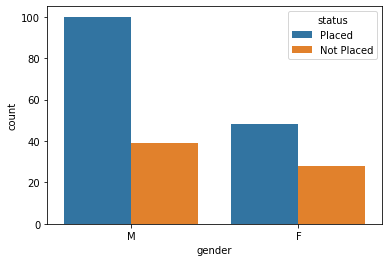

In [12]:
sns.countplot("gender", hue = "status", data = data)
plt.show()

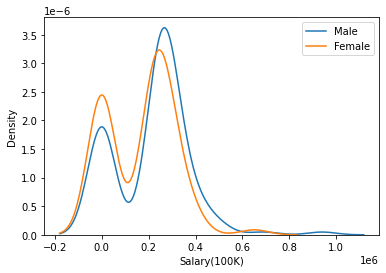

In [15]:
sns.kdeplot(data.salary[data.gender == "M"])
sns.kdeplot(data.salary[data.gender == "F"])
plt.legend(["Male", "Female"])
plt.xlabel("Salary(100K)")
plt.show()

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


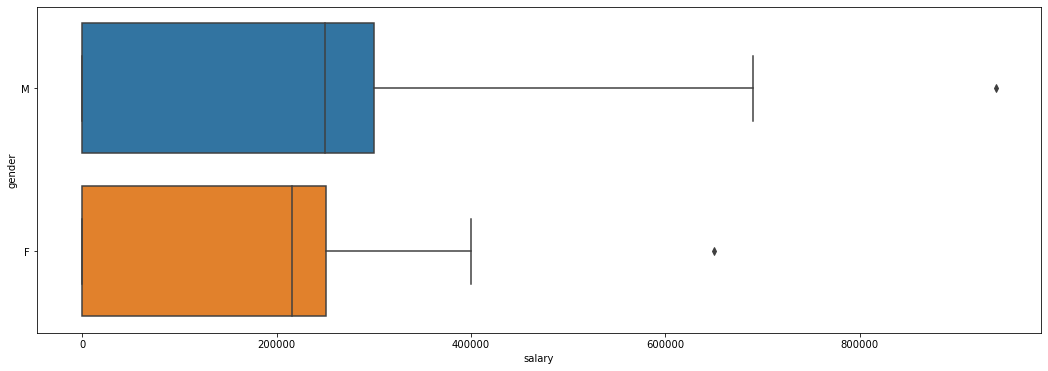

In [16]:
plt.figure(figsize = (18, 6))
sns.boxplot("salary", "gender", data = data)
plt.show()

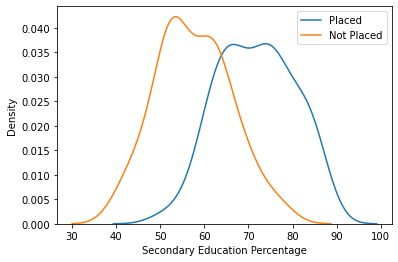

In [17]:
sns.kdeplot(data.ssc_p[data.status=="Placed"])
sns.kdeplot(data.ssc_p[data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Secondary Education Percentage")
plt.show()

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


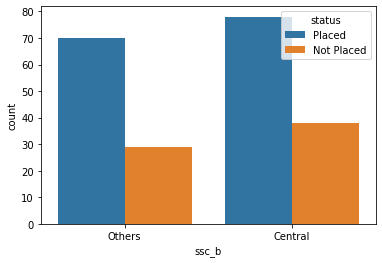

In [18]:
sns.countplot("ssc_b", hue="status", data=data)
plt.show()

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


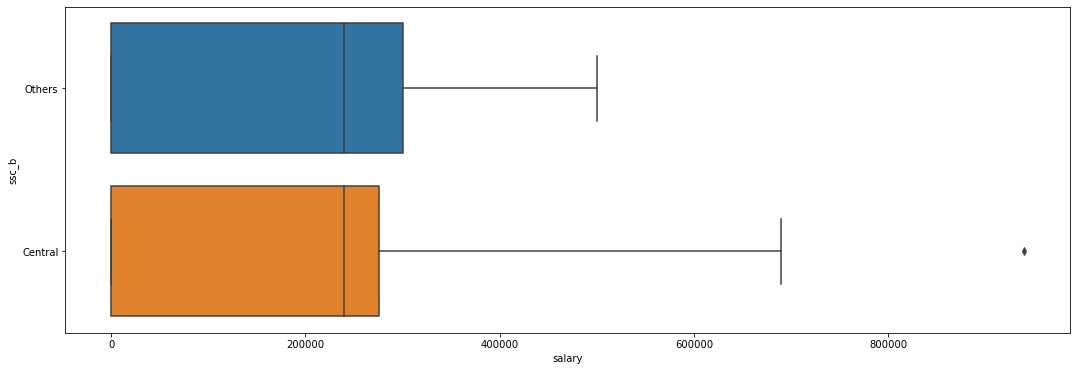

In [19]:
plt.figure(figsize=(18,6))
sns.boxplot("salary","ssc_b",data=data)
plt.show()

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


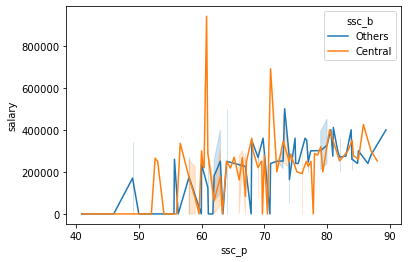

In [20]:
sns.lineplot("ssc_p", "salary", hue="ssc_b", data=data)
plt.show()

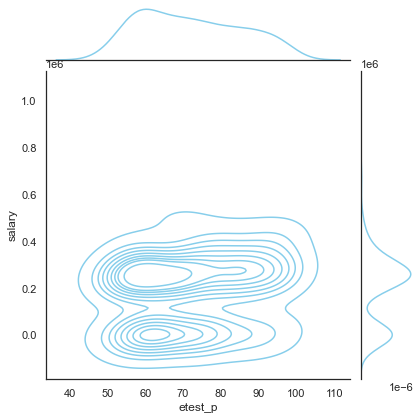

In [21]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="white", color_codes=True)
sns.jointplot(x=data["etest_p"], y=data["salary"], kind="kde", color="skyblue")

plt.show()

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

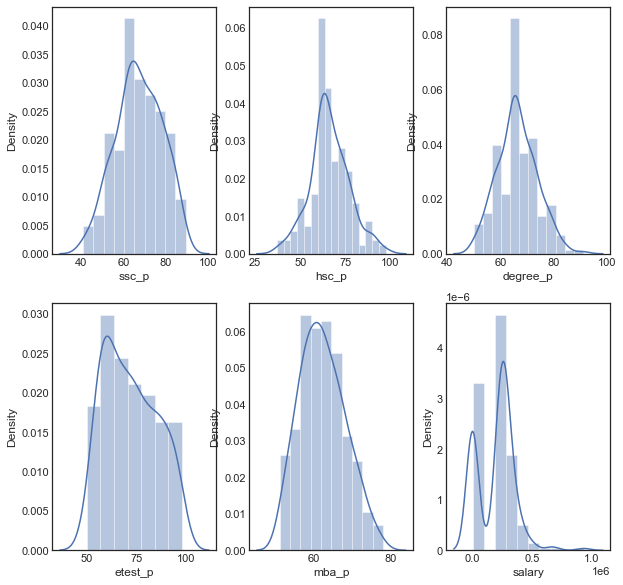

In [22]:
plt.figure(figsize=(15,7))
plt.style.use('seaborn-white')
plt.subplot(231)
sns.distplot(data['ssc_p'])
fig=plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(data['hsc_p'])
fig=plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(data['degree_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(data['etest_p'])
fig=plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(data['mba_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(data['salary'])
fig=plt.gcf()
fig.set_size_inches(10,10)

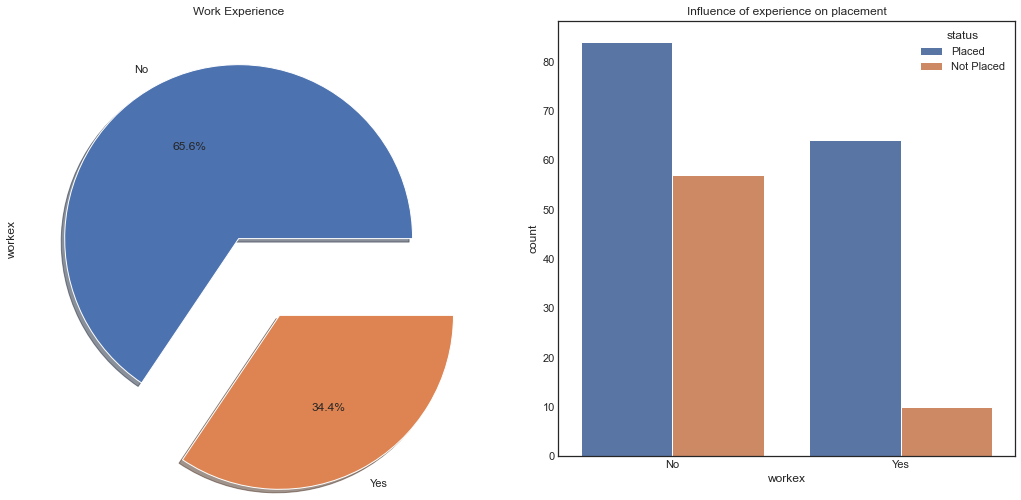

In [23]:
plt.style.use('seaborn-white')
f, ax=plt.subplots(1,2,figsize=(18,8))
data['workex'].value_counts().plot.pie(explode=[0,0.5], autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Work Experience')
sns.countplot(x='workex', hue='status', data=data)
ax[1].set_title('Influence of experience on placement')

plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder
object_cols = ['gender', 'workex', 'specialisation', 'status']

label_encoder = LabelEncoder()
for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [26]:
x = data[['ssc_p', 'hsc_p', 'degree_p', 'etest_p']]
y = data['status']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

In [29]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8153846153846154
              precision    recall  f1-score   support

           0       0.72      0.65      0.68        20
           1       0.85      0.89      0.87        45

    accuracy                           0.82        65
   macro avg       0.79      0.77      0.78        65
weighted avg       0.81      0.82      0.81        65



In [30]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

y_pred = random_forest.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8923076923076924
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        20
           1       0.90      0.96      0.92        45

    accuracy                           0.89        65
   macro avg       0.89      0.85      0.87        65
weighted avg       0.89      0.89      0.89        65



In [31]:
logr = LogisticRegression(solver='lbfgs')
logr.fit(x_train, y_train)

y_pred = logr.predict(x_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8461538461538461
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.87      0.91      0.89        45

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.81        65
weighted avg       0.84      0.85      0.84        65



In [32]:
pickle.dump(random_forest, open('model_classifier.pkl', 'wb'))